In [1]:
from preprocessing import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm, trange
# Data to be written
DATA_PATH = 'C:/Users/amityu/Gel_Sheet_Data/'
movie = '100621'
MOVIE_PATH = DATA_PATH + movie + '/'
GRAPH_PATH = 'C:Users/amityu/Gel_Sheet_Graph/'
import pandas as pd

In [2]:
preprocessing.make_json_file(movie)

In [38]:
import os
import tifffile as tiff
#get file list from Moive_Path /TIF

file_list = os.listdir(MOVIE_PATH + 'tif/')
file_list.sort(key= lambda x: int(x.split('_')[0][1:]))
array_list = []
for file in tqdm(file_list):
    array_list.append(tiff.imread(MOVIE_PATH + 'tif/' + file))
gel = np.array(array_list)
np.save(MOVIE_PATH + 'np/gel.npy',gel)






100%|██████████| 44/44 [00:01<00:00, 29.44it/s]


In [39]:
data = pd.read_excel(MOVIE_PATH +'add_data/100621_data.xlsx')
data['t'] = data['t'].astype(int)
data['z slices'] = data['z slices'].astype(int)
for idx,row in data.iterrows():
    gel[row['t'], row['z slices']:,:,:] = np.nan



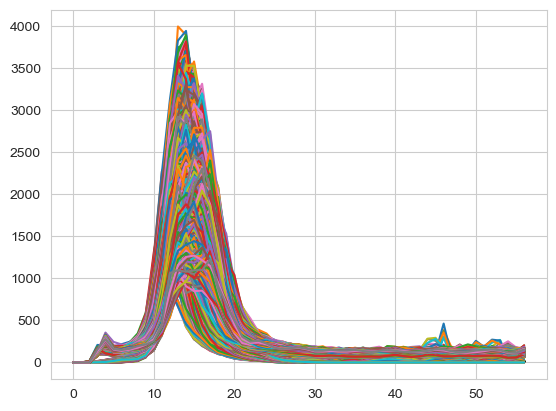

In [34]:
x = 256
for t  in range(0,len(gel),5):
    plt.plot(gel[t,:,x])
plt.show()


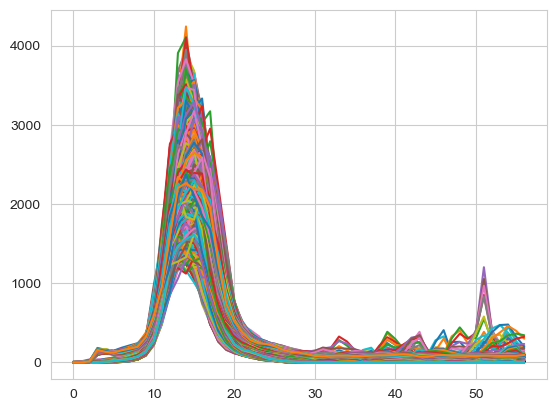

In [18]:
x = 256
for t  in range(0,30,5):
    plt.plot(gel[t,:,:,x])
plt.show()


In [40]:
# removing the first 10 frames to eliminate noise
gel[:,0:6,:,:] = np.nan

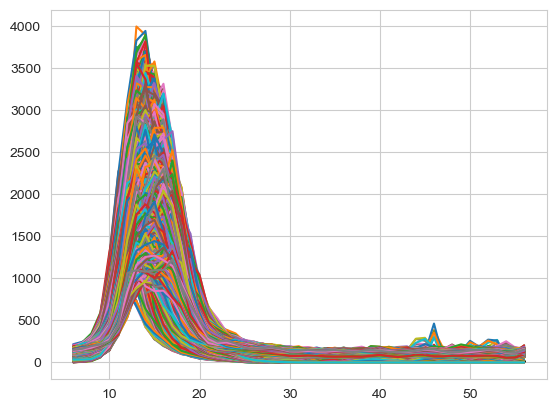

In [36]:
x = 256
for t in range(0, len(gel), 5):
    plt.plot(gel[t, :, x])
plt.show()


In [24]:
np.save( MOVIE_PATH +'np/gel_256_crop.npy', gel[:,:,:,256])

Now view on napari


In [41]:
#replace nan with 0 in gel
gel = np.nan_to_num(gel)

gel = preprocessing.normalize_to_background(gel,0,256,(33,0),(57,511))


  0%|          | 0/44 [00:00<?, ?it/s]

In [43]:
#save to gel_norm.npy
np.save(MOVIE_PATH + 'np/gel_norm.npy',gel)


In [3]:
gel = np.load(MOVIE_PATH + 'np/gel_norm.npy', mmap_mode='r+')

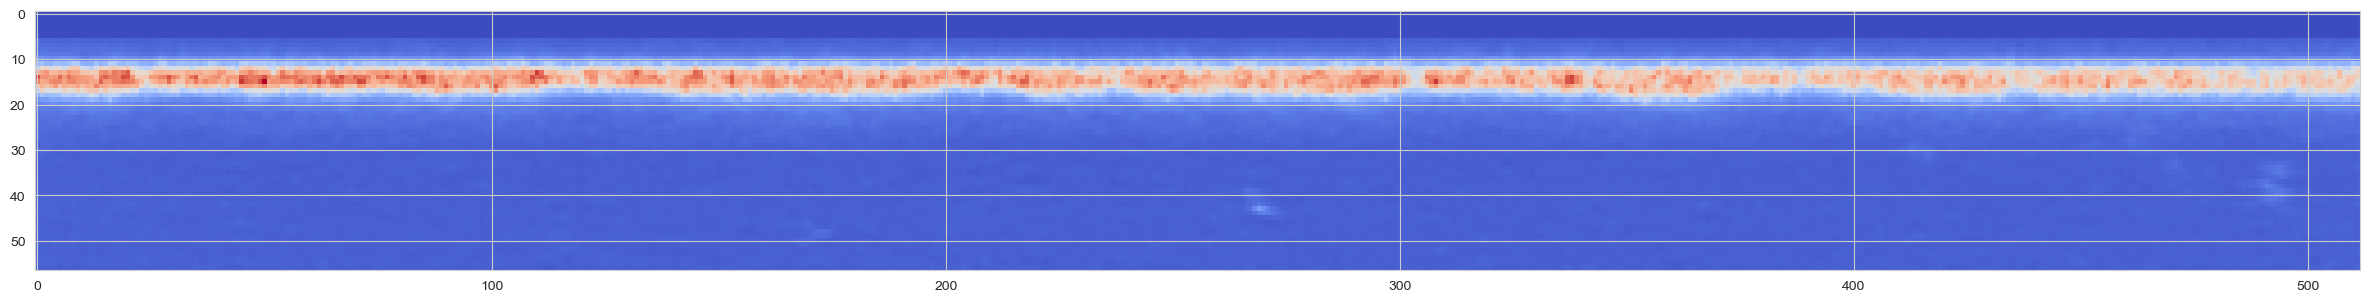

In [49]:
x =256
image = gel[40,:,:,x]
plt.figure(figsize=(30,30))
plt.imshow(image, cmap='coolwarm')
plt.show()


C:\Users\amityu\AppData\Local\anaconda3\lib\site-packages\skimage\filters\rank\bilateral.py:36: UserWarning: Bad rank filter performance is expected due to a large number of bins (2889), equivalent to an approximate bitdepth of 11.5.
  image, footprint, out, mask, n_bins = _preprocess_input(


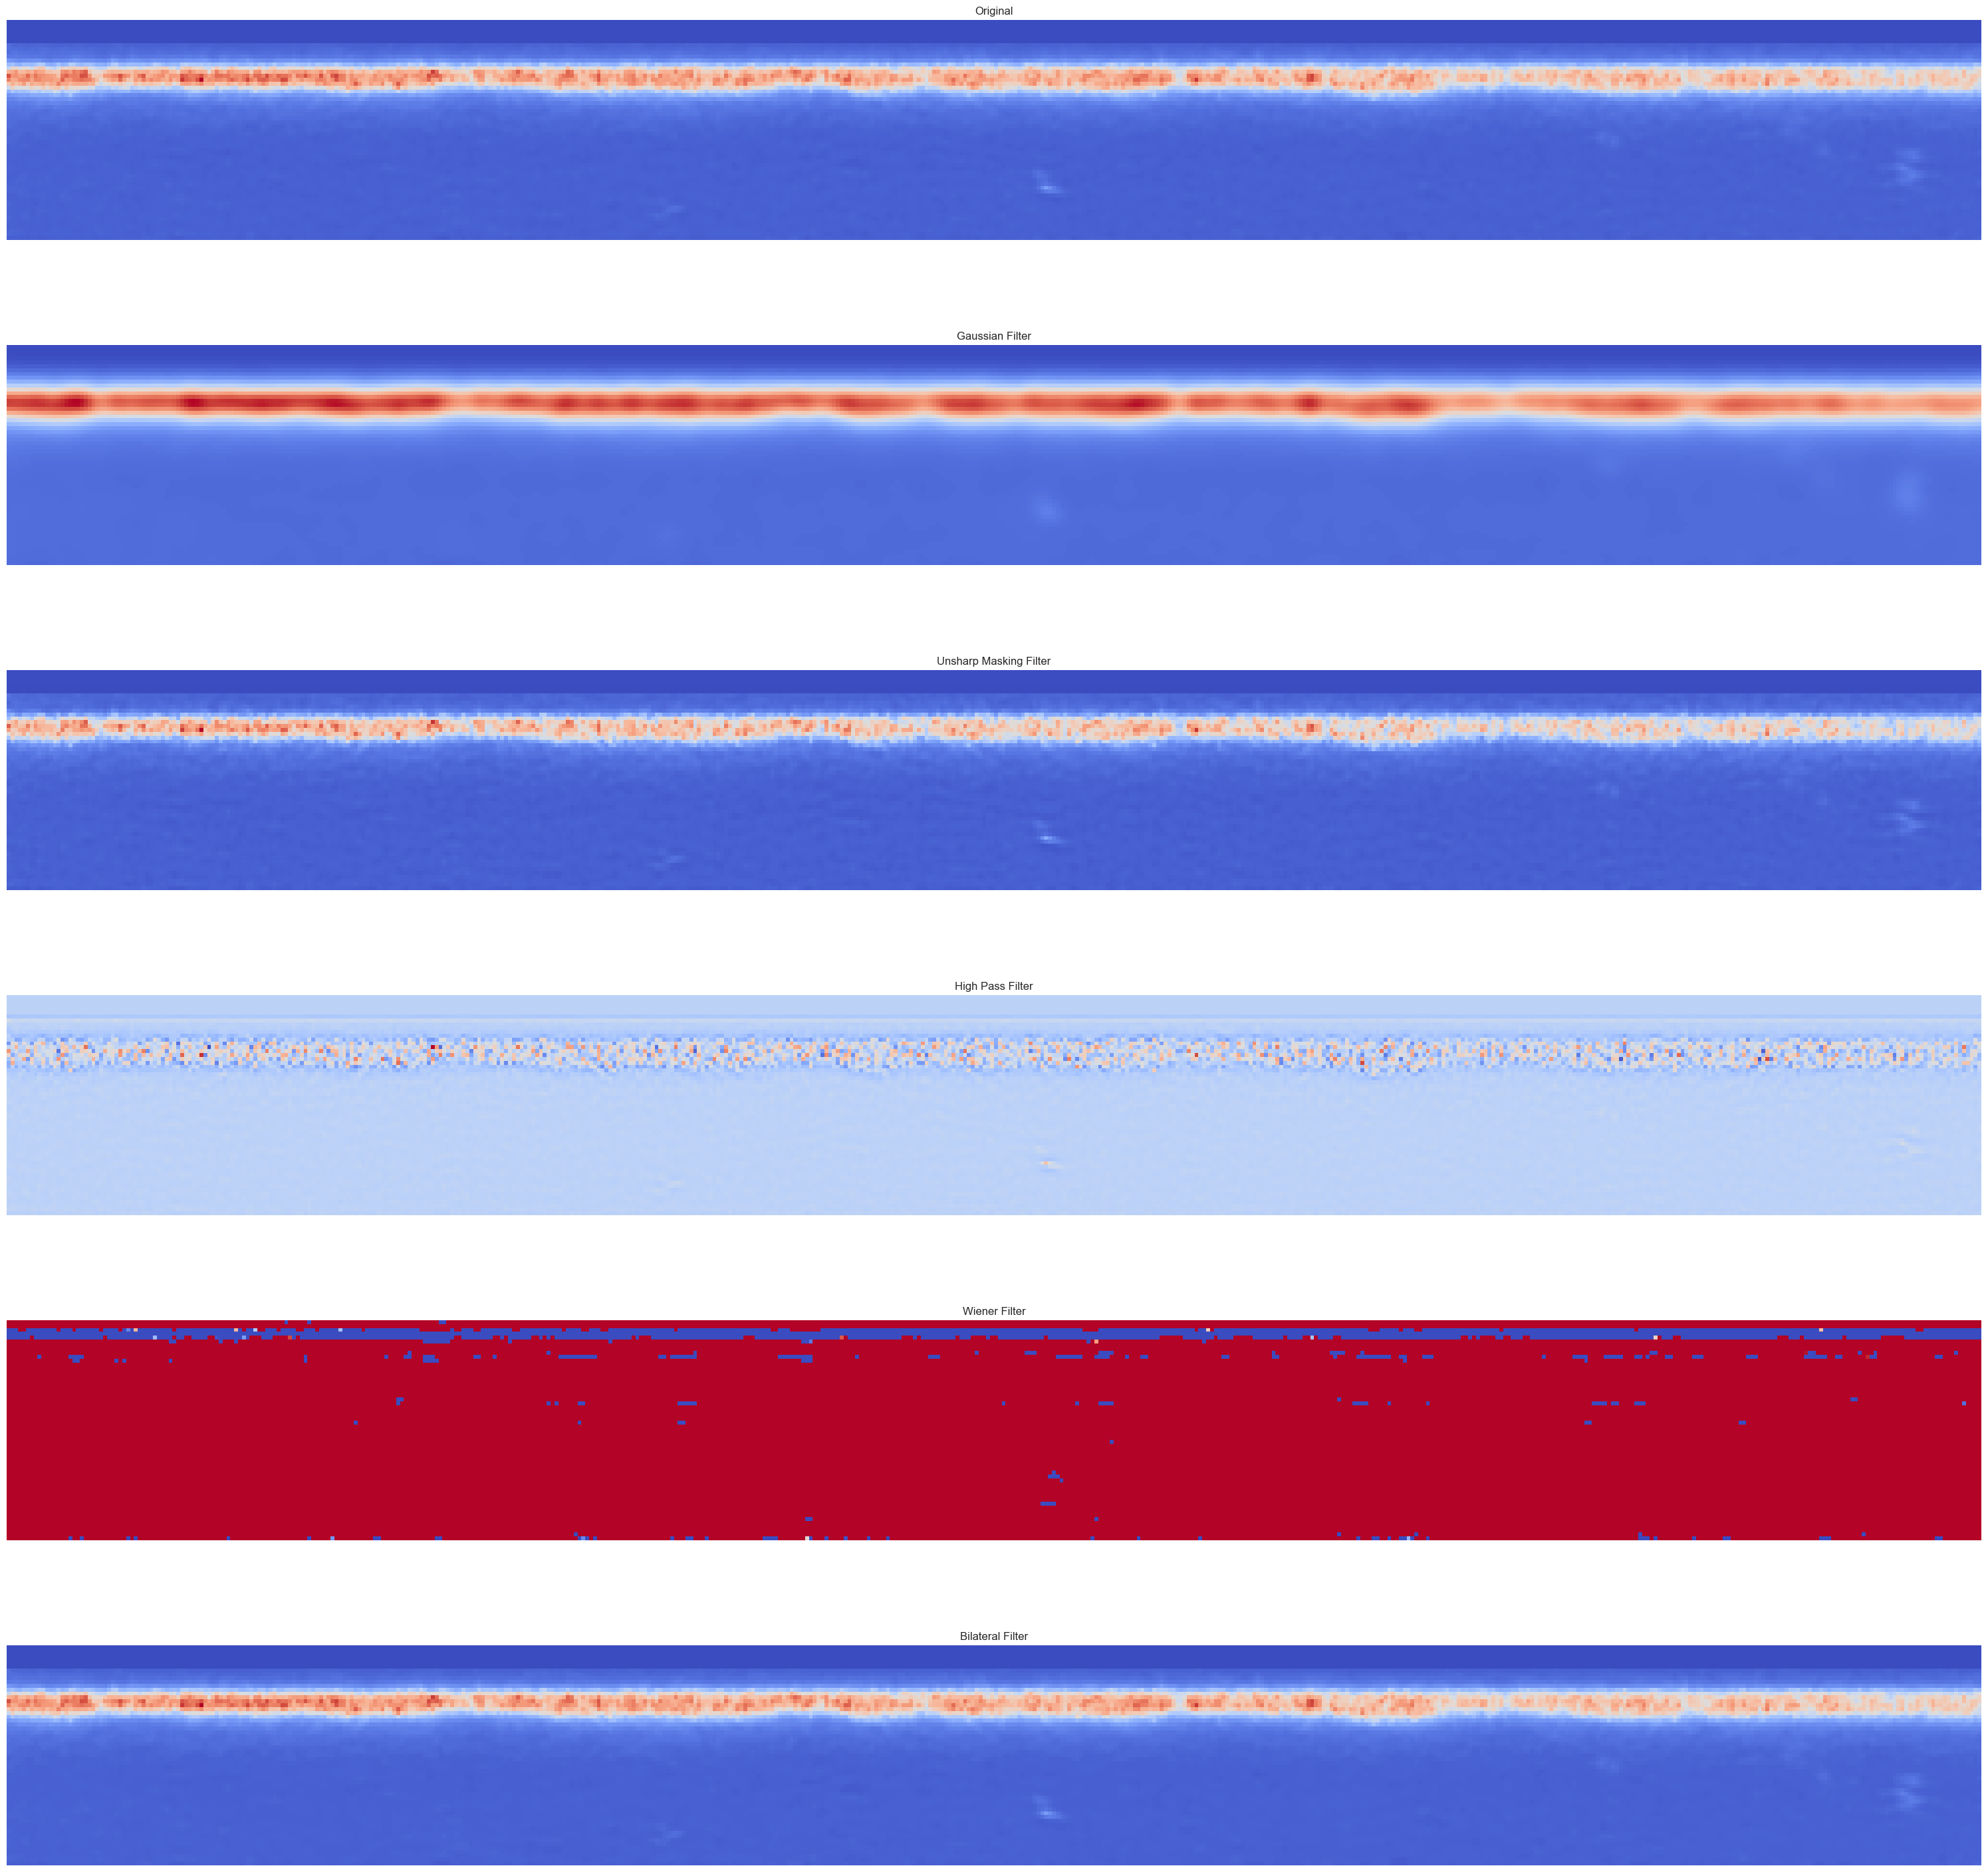

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, restoration

# Load an example image

# Apply the Gaussian filter
gaussian_filtered = filters.gaussian(image, sigma=2)

# Apply the unsharp masking filter
unsharp_masked = filters.unsharp_mask(image, radius=1, amount=1.0)

# Apply the high pass filter
high_pass = filters.laplace(image)

# Apply the Wiener filter
psf = np.ones((5, 5)) / 25
wiener_filtered, _ = restoration.unsupervised_wiener(image, psf=psf)

# Apply the bilateral filter
bilateral_filtered = filters.rank.mean_bilateral(image,np.ones((5,5)), s0=10, s1=10)

# Plot the original and filtered images
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(30, 30))
ax = axes.ravel()

ax[0].imshow(image, cmap='coolwarm')
ax[0].set_title('Original')

ax[1].imshow(gaussian_filtered, cmap='coolwarm')
ax[1].set_title('Gaussian Filter')

ax[2].imshow(unsharp_masked, cmap='coolwarm')
ax[2].set_title('Unsharp Masking Filter')

ax[3].imshow(high_pass, cmap='coolwarm')
ax[3].set_title('High Pass Filter')

ax[4].imshow(wiener_filtered, cmap='coolwarm')
ax[4].set_title('Wiener Filter')

ax[5].imshow(bilateral_filtered, cmap='coolwarm')
ax[5].set_title('Bilateral Filter')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()


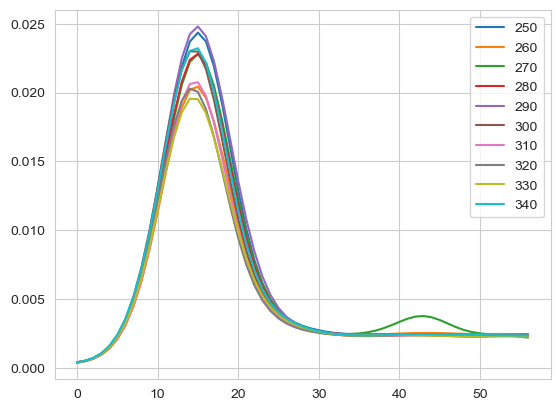

In [47]:
#import gaussian from skimage
from skimage.filters import gaussian


for y in range(250,350,10):
    plt.plot(gaussian(bilateral_filtered[:,y],3), label = y)
plt.legend()
plt.show()


In [ ]:
for y in range(250,350,10):
    plt.hist(gaussian(bilateral_filtered[:,y],3))
    plt.show()


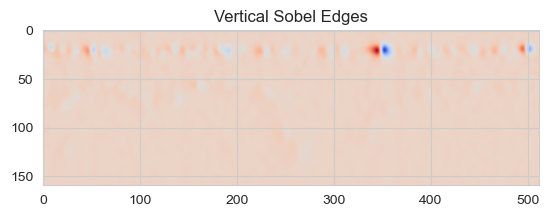

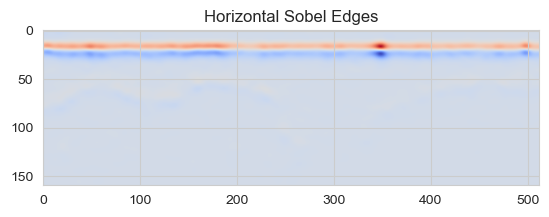

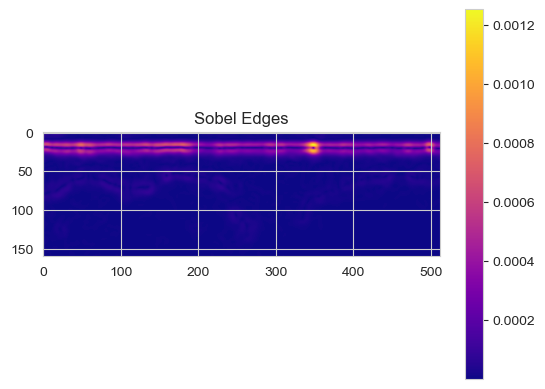

"thresh = 0.1 # adjust this parameter to control the threshold\nedges_thresh = edges > thresh\n\n# Plot the original and thresholded images\nfig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))\nax = axes.ravel()\n\nax[0].imshow(image, cmap='gray')\nax[0].set_title('Original')\n\nax[1].imshow(edges_thresh, cmap='gray')\nax[1].set_title('Vertical Sobel Edges')\n\nfor a in ax:\n    a.axis('off')\n\nplt.tight_layout()\nplt.show()"

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters

image = gaussian(bilateral_filtered,3)
# Apply the horizontal Sobel filter
edgesh = filters.sobel_h(image)
# Apply the vertical Sobel filter
edgesv = filters.sobel_v(image)
#apply sobel filter
edges = filters.sobel(image)

plt.imshow(edgesv, cmap='coolwarm')
plt.title('Vertical Sobel Edges')
plt.show()
plt.imshow(edgesh, cmap='coolwarm')
plt.title('Horizontal Sobel Edges')
plt.show()
plt.imshow(edges, cmap='plasma')
plt.title('Sobel Edges')
plt.colorbar()
plt.show()


# Apply a threshold to the edges to detect vertical edges
'''thresh = 0.1 # adjust this parameter to control the threshold
edges_thresh = edges > thresh

# Plot the original and thresholded images
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')

ax[1].imshow(edges_thresh, cmap='gray')
ax[1].set_title('Vertical Sobel Edges')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()'''

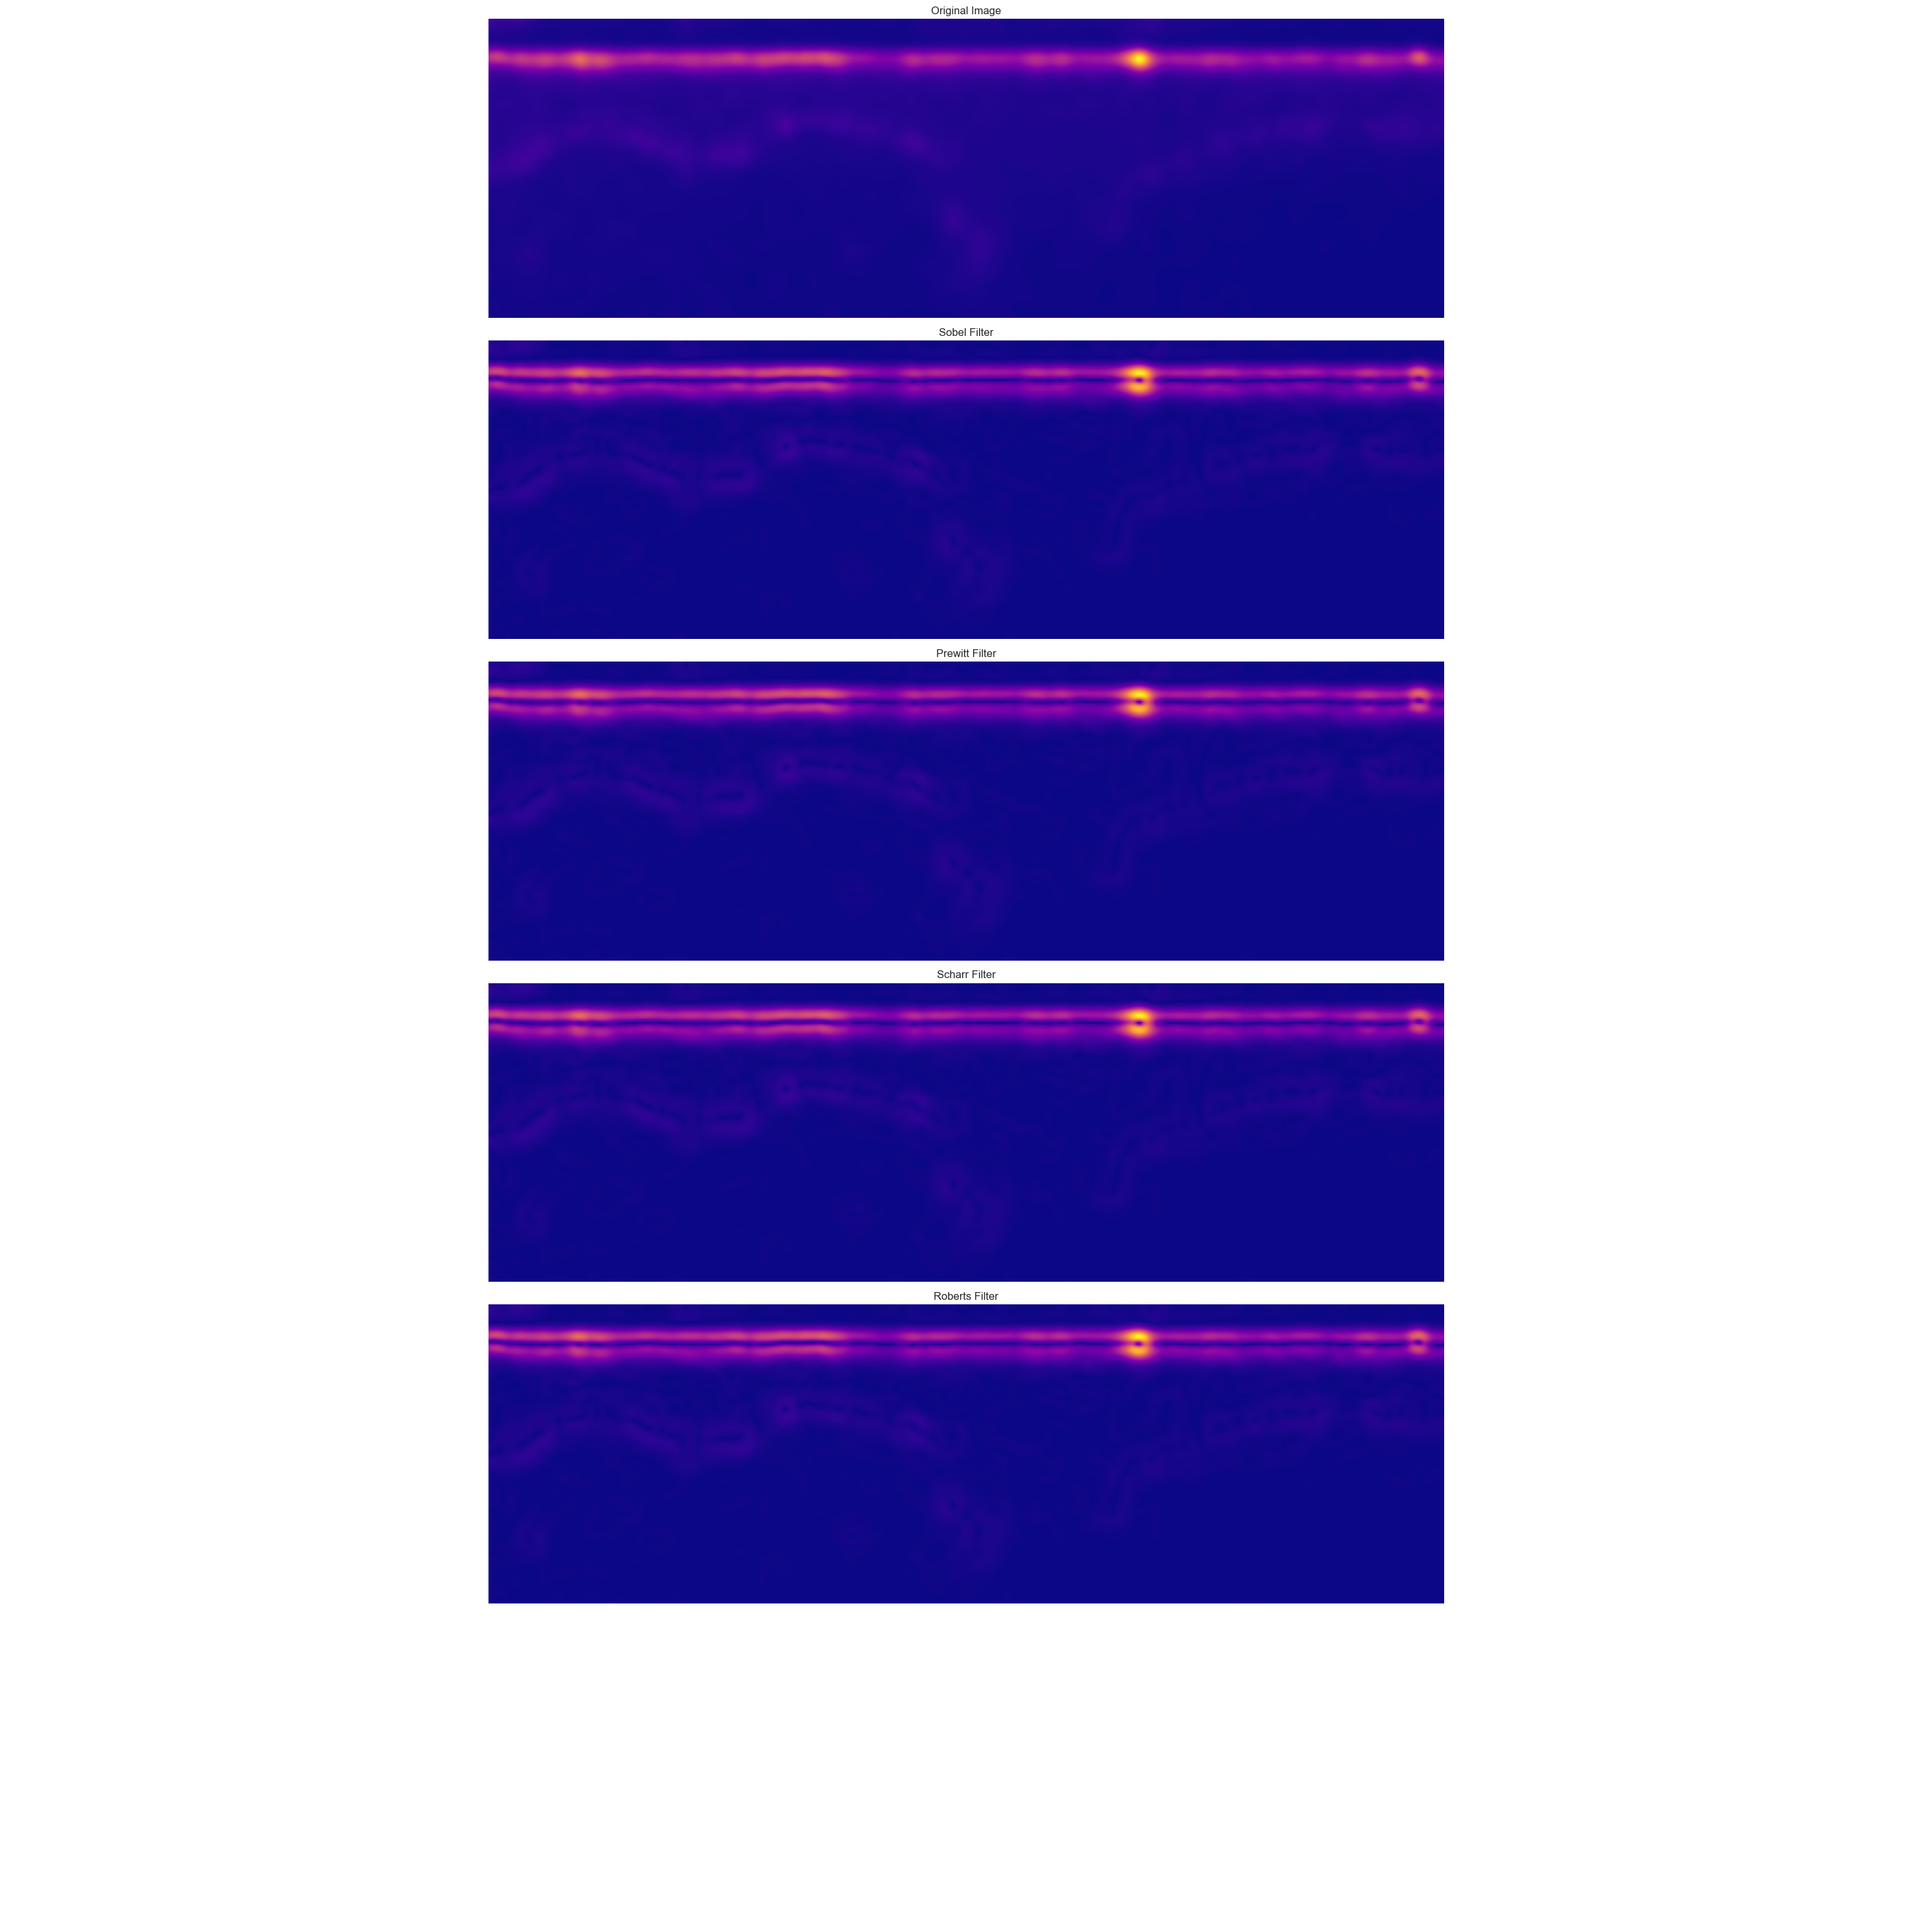

In [12]:
from skimage import io, filters

# load an example image

# apply all the edge detection filters
sobel_edges = filters.sobel(image)
prewitt_edges = filters.prewitt(image)
scharr_edges = filters.scharr(image)
roberts_edges = filters.roberts(image)
#canny_edges = filters.canny(image)

# display the results
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(30, 30))

ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.plasma)
ax[0].set_title('Original Image')

ax[1].imshow(sobel_edges, cmap=plt.cm.plasma)
ax[1].set_title('Sobel Filter')

ax[2].imshow(prewitt_edges, cmap=plt.cm.plasma)
ax[2].set_title('Prewitt Filter')

ax[3].imshow(scharr_edges, cmap=plt.cm.plasma)
ax[3].set_title('Scharr Filter')

ax[4].imshow(roberts_edges, cmap=plt.cm.plasma)
ax[4].set_title('Roberts Filter')

#ax[5].imshow(canny_edges, cmap=plt.cm.plasma)
#ax[5].set_title('Canny Filter')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()


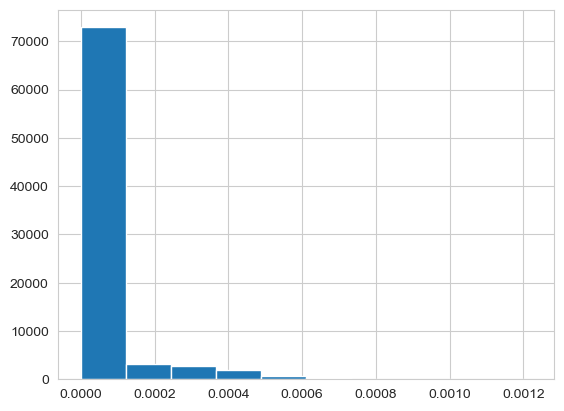

In [51]:
plt.hist(edges.flatten())
plt.show()


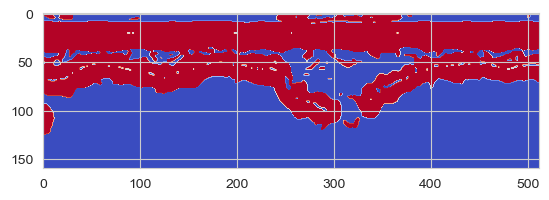

In [46]:
mask = edges > 0.00001
plt.imshow(mask, cmap='coolwarm')
plt.show()


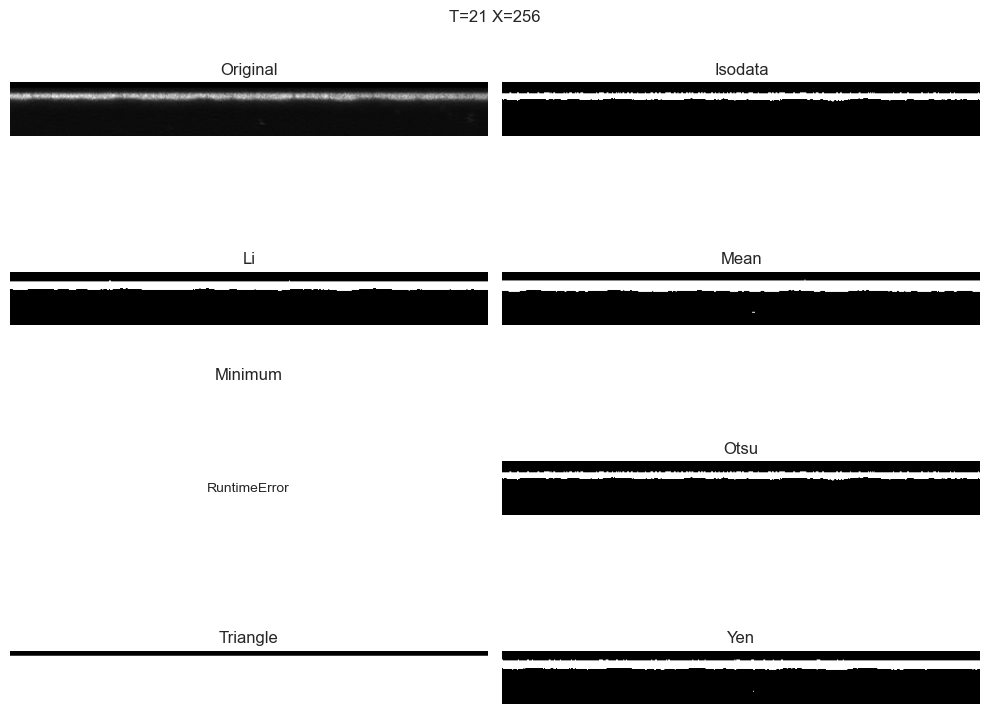

In [50]:
#show all thresholds of edges, use function from skimage
from skimage.filters import try_all_threshold
fig, ax = filters.try_all_threshold(image, figsize=(10, 8), verbose=False)
fig.suptitle('T=%d X=%d'%(21,x))

plt.show()

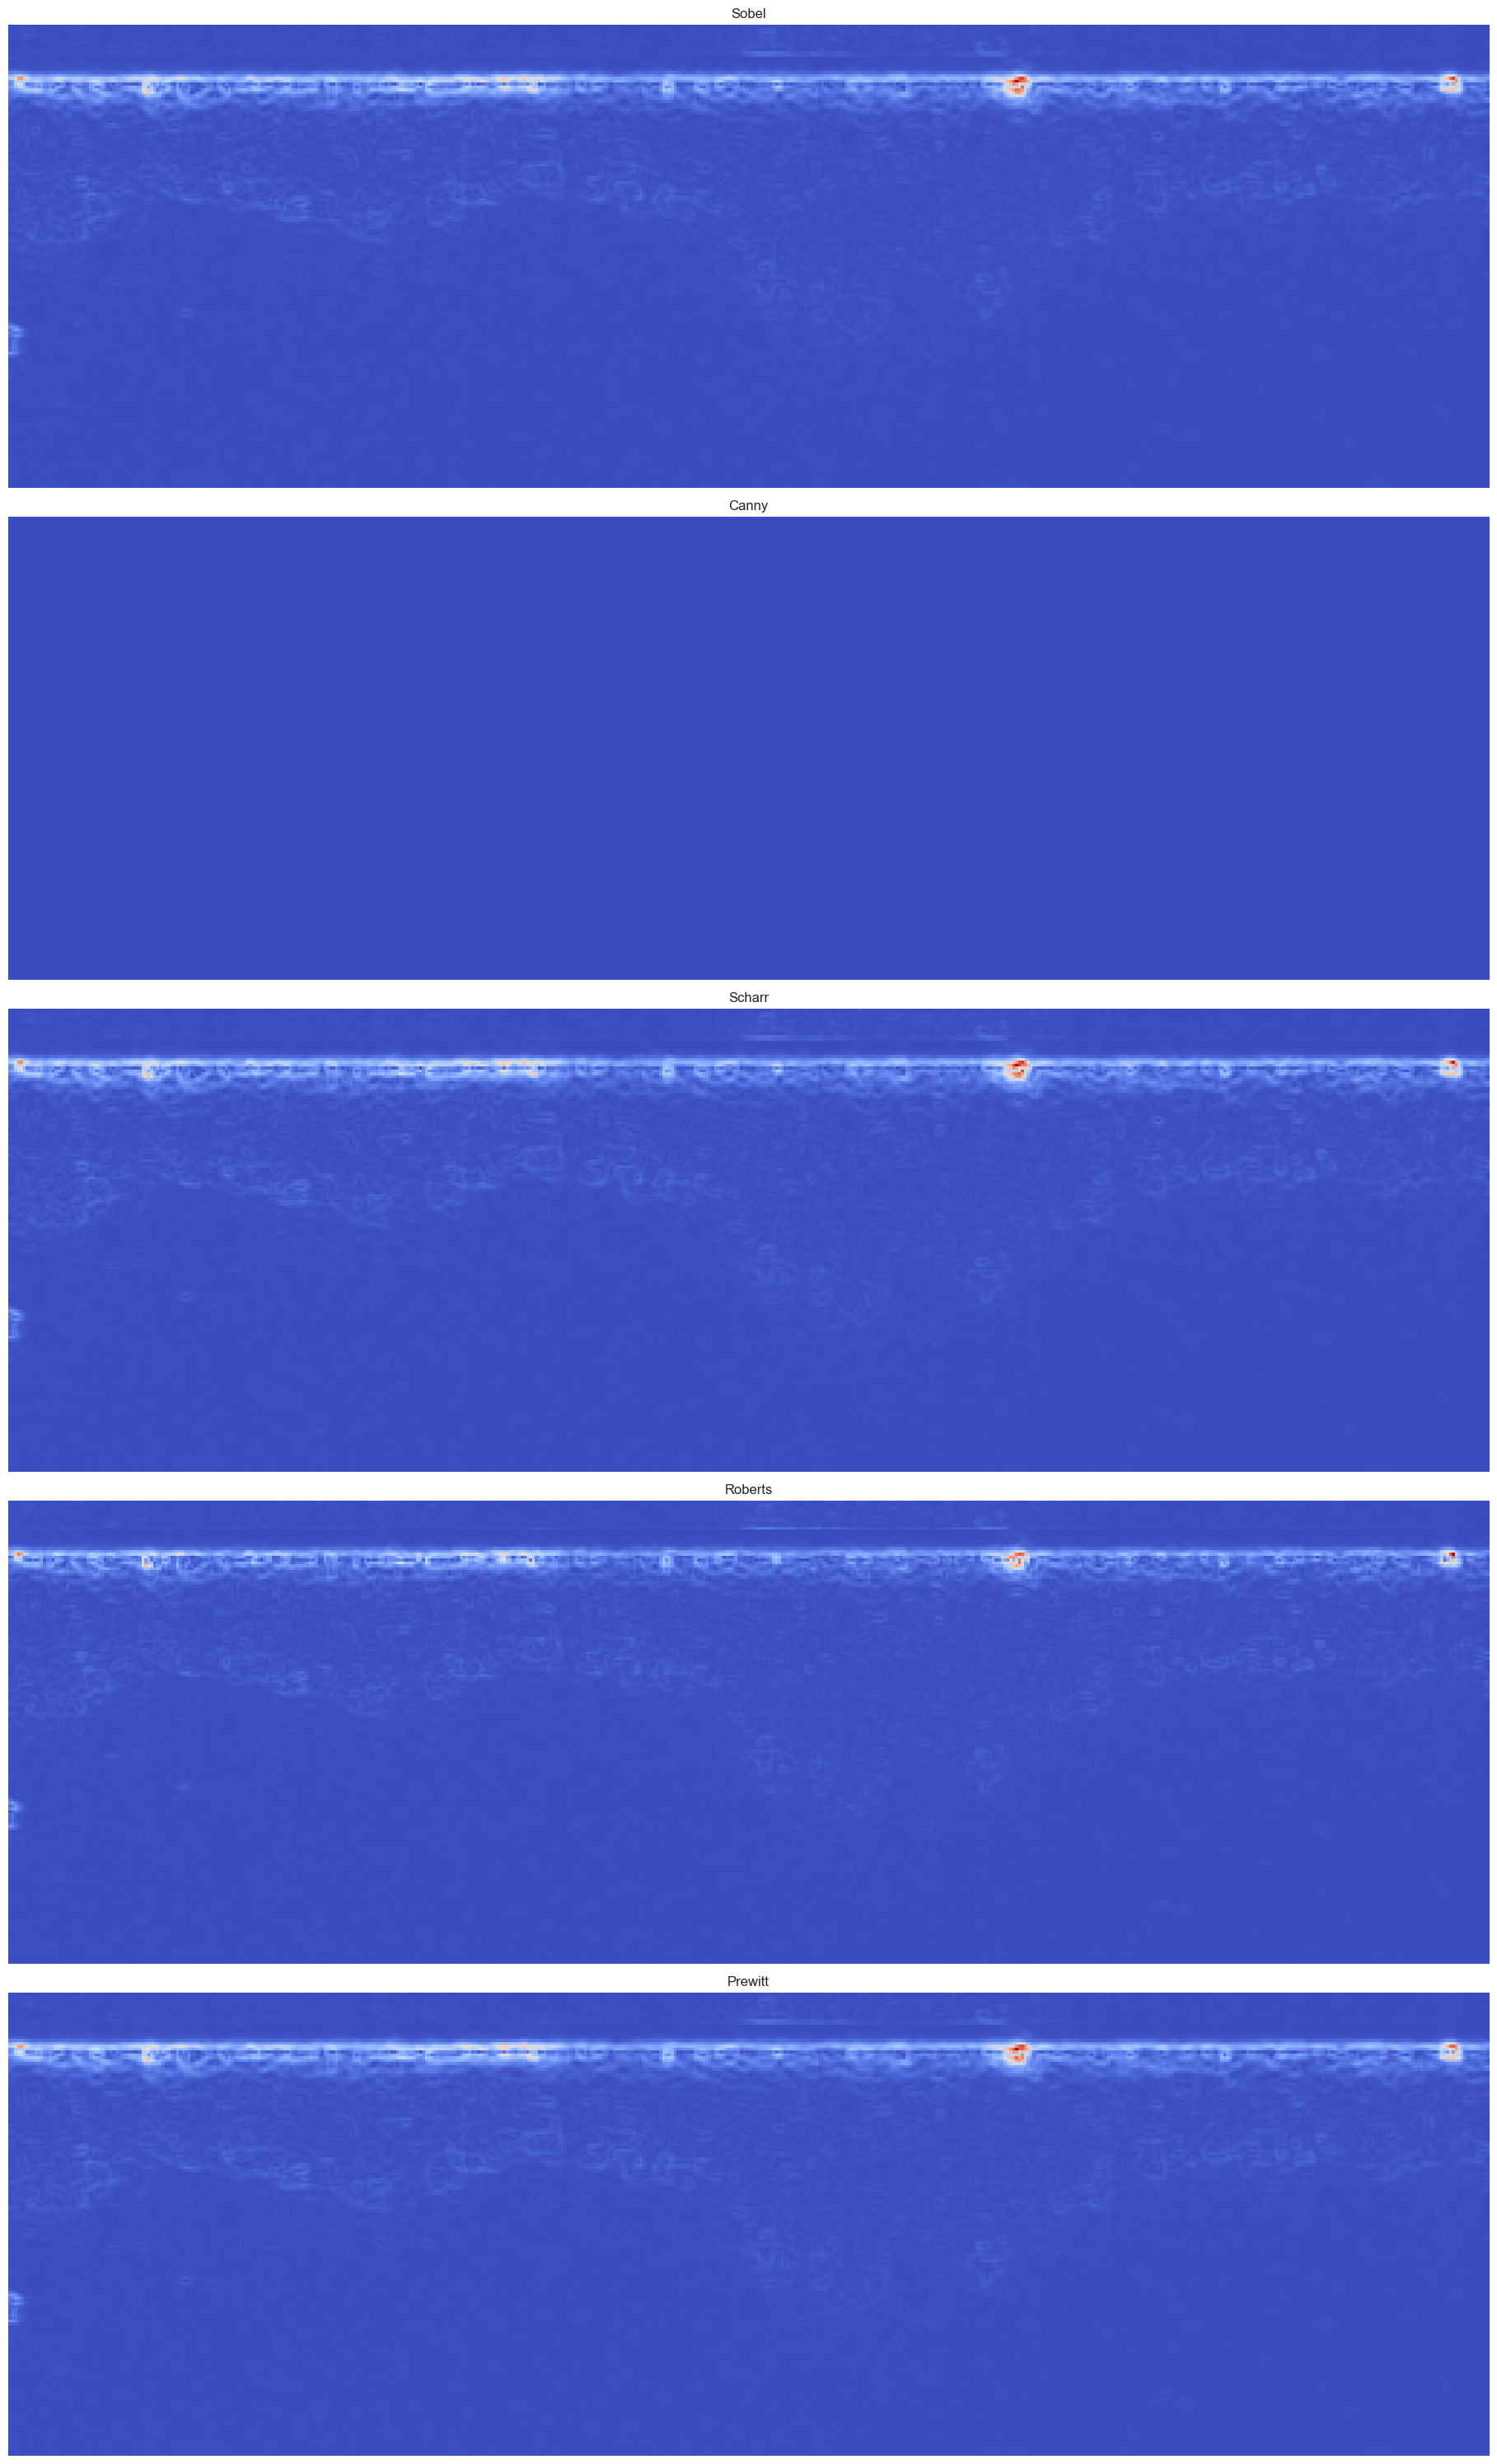

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, filters, feature

def show_edge_detection_filters(image):
    fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(50, 30))

    # Apply Sobel filter
    edges_sobel = filters.sobel(image)
    axes[0].imshow(edges_sobel, cmap='coolwarm')
    axes[0].set_title('Sobel')

    # Apply Canny filter
    edges_canny = feature.canny(image, sigma=2)
    axes[1].imshow(edges_canny, cmap='coolwarm')
    axes[1].set_title('Canny')

    # Apply Scharr filter
    edges_scharr = filters.scharr(image)
    axes[2].imshow(edges_scharr, cmap='coolwarm')
    axes[2].set_title('Scharr')

    # Apply Roberts filter
    edges_roberts = filters.roberts(image)
    axes[3].imshow(edges_roberts, cmap='coolwarm')
    axes[3].set_title('Roberts')

    # Apply Prewitt filter
    edges_prewitt = filters.prewitt(image)
    axes[4].imshow(edges_prewitt, cmap='coolwarm')
    axes[4].set_title('Prewitt')

    for ax in axes:
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# Load an example image

# Apply and display the edge detection filters
show_edge_detection_filters(image)


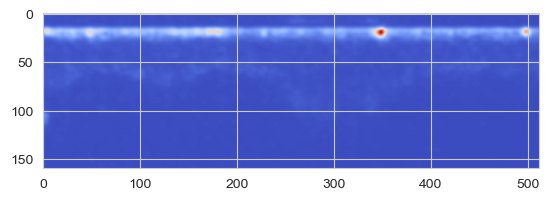

In [23]:
 edges_scharr = filters.scharr(image)
plt.imshow(gaussian(edges_scharr,2), cmap='coolwarm')
plt.show()

In [4]:
#load surface
import tifffile
added_gap_width = 8
surface = np.load(MOVIE_PATH + 'np/height.npy').astype(int)
plate = np.load(MOVIE_PATH + 'np/plate.npy').astype(int)
surface = surface.reshape(len(surface), 512, 512)
plate = plate.reshape(len(plate), 512, 512)

gel_masked = gel.copy()
for t in trange(len(gel_masked)):
    for x  in range(gel_masked.shape[3]):



        for y in range(gel_masked.shape[2]):
            gel_masked[t,0:plate[t][y, x],y,x] = 0
            gel_masked[t,(plate[t][y, x]+ surface[t][y, x])+added_gap_width:,y,x] = 0
    tifffile.imwrite(MOVIE_PATH + 'export/gel_masked_t%d_gap%d.tif'%(t,added_gap_width), gel_masked[t])

np.save(MOVIE_PATH + 'np/gel_masked_added%d.npy'%added_gap_width, gel_masked)


100%|██████████| 74/74 [02:01<00:00,  1.64s/it]


In [9]:
import tifffile
for t in trange(len(gel_black)):
    tifffile.imwrite(MOVIE_PATH + 'export/CCA60_norm_black_tif/gel_norm_blackt%d.tif'%t, gel_black[t])


100%|██████████| 74/74 [00:03<00:00, 19.27it/s]
